Introduction: Restaurant_sentiment_analysis

 In data science Project, we are going to perform Sentiment analysis on restaurant dataset.
 categorize sentiment based on ServiceRating and FoodRating  to determine the emotional tone expressed in a piece of text.That can be in positive to negative, or sometimes neutral. By analyzing text data, To gain valuable insights into public opinion and customer feedback.

In [65]:
# importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


It gives idea about number of columns and the data data present in that column

In [66]:
# import the data  into the dataset
dataset=pd.read_csv("resto_data.csv")
dataset.head(7)


,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,WaitTime,ServiceRating,FoodRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3.0,Business,Takeaway,0,1,43.523929,2,5,0
1,655,19,Male,43623,Rarely,NaN,American,Dinner,1.0,Casual,Dine-in,0,0,57.524294,5,5,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6.0,Celebration,Dine-in,0,1,48.682623,3,4,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1.0,Celebration,Dine-in,0,0,7.552993,4,5,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1.0,Business,Takeaway,0,0,37.789041,2,3,0
5,659,42,Female,28860,Monthly,111.064696,Chinese,Dinner,8.0,Celebration,Takeaway,0,1,26.853298,4,5,0
6,660,20,Female,131104,Weekly,120.236707,Indian,Lunch,NaN,Business,Dine-in,0,0,7.927917,5,4,0


In [67]:
dataset.shape

(1500, 17)

In [68]:
dataset.describe()

,CustomerID,Age,Income,AverageSpend,GroupSize,OnlineReservation,DeliveryOrder,WaitTime,ServiceRating,FoodRating,HighSatisfaction
count,1500.000000,1500.000000,1500.000000,1484.000000,1486.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1403.500000,43.832000,85921.890000,105.528404,5.030956,0.296667,0.405333,30.163550,3.044000,2.997333,0.134000
std,433.157015,14.967157,38183.051749,52.325747,2.557431,0.456941,0.491120,17.214184,1.423405,1.418920,0.340766
min,654.000000,18.000000,20012.000000,10.306127,1.000000,0.000000,0.000000,0.001380,1.000000,1.000000,0.000000
25%,1028.750000,31.750000,52444.000000,62.241740,3.000000,0.000000,0.000000,15.235423,2.000000,2.000000,0.000000
50%,1403.500000,44.000000,85811.000000,104.131709,5.000000,0.000000,0.000000,30.044055,3.000000,3.000000,0.000000
75%,1778.250000,57.000000,119159.250000,148.583357,7.000000,1.000000,1.000000,45.285649,4.000000,4.000000,0.000000
max,2153.000000,69.000000,149875.000000,199.973526,9.000000,1.000000,1.000000,59.970762,5.000000,5.000000,1.000000


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1500 non-null   int64  
 1   Age                1500 non-null   int64  
 2   Gender             1500 non-null   object 
 3   Income             1500 non-null   int64  
 4   VisitFrequency     1481 non-null   object 
 5   AverageSpend       1484 non-null   float64
 6   PreferredCuisine   1500 non-null   object 
 7   TimeOfVisit        1500 non-null   object 
 8   GroupSize          1486 non-null   float64
 9   DiningOccasion     1486 non-null   object 
 10  MealType           1500 non-null   object 
 11  OnlineReservation  1500 non-null   int64  
 12  DeliveryOrder      1500 non-null   int64  
 13  WaitTime           1500 non-null   float64
 14  ServiceRating      1500 non-null   int64  
 15  FoodRating         1500 non-null   int64  
 16  HighSatisfaction   1500 

In [70]:
#performing EDA on dataset
dataset.isnull().sum()

CustomerID            0
Age                   0
Gender                0
Income                0
VisitFrequency       19
AverageSpend         16
PreferredCuisine      0
TimeOfVisit           0
GroupSize            14
DiningOccasion       14
MealType              0
OnlineReservation     0
DeliveryOrder         0
WaitTime              0
ServiceRating         0
FoodRating            0
HighSatisfaction      0
dtype: int64

In [71]:
(dataset.isnull().sum()/dataset.shape[0])*100

CustomerID           0.000000
Age                  0.000000
Gender               0.000000
Income               0.000000
VisitFrequency       1.266667
AverageSpend         1.066667
PreferredCuisine     0.000000
TimeOfVisit          0.000000
GroupSize            0.933333
DiningOccasion       0.933333
MealType             0.000000
OnlineReservation    0.000000
DeliveryOrder        0.000000
WaitTime             0.000000
ServiceRating        0.000000
FoodRating           0.000000
HighSatisfaction     0.000000
dtype: float64

In [72]:
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

0.24705882352941178

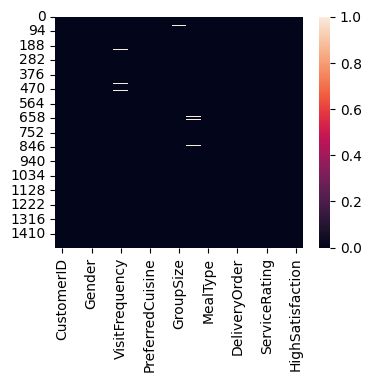

In [73]:
# visualizing null values
plt.figure(figsize=(4,3))
sns.heatmap(dataset.isnull())
plt.show()

In [74]:
dataset.select_dtypes(include="object").columns

Index(['Gender', 'VisitFrequency', 'PreferredCuisine', 'TimeOfVisit',
       'DiningOccasion', 'MealType'],
      dtype='object')

In [ ]:
for i in dataset.select_dtypes(include="object").columns:
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)

C:\Users\Manasa\AppData\Local\Temp\ipykernel_17340\2262683910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0],inplace=True)


In [76]:
for i in dataset.select_dtypes(include="float64").columns:
    dataset[i].fillna(dataset[i].mean(),inplace=True)

C:\Users\Manasa\AppData\Local\Temp\ipykernel_17340\3974513424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mean(),inplace=True)


In [77]:
dataset.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Income               0
VisitFrequency       0
AverageSpend         0
PreferredCuisine     0
TimeOfVisit          0
GroupSize            0
DiningOccasion       0
MealType             0
OnlineReservation    0
DeliveryOrder        0
WaitTime             0
ServiceRating        0
FoodRating           0
HighSatisfaction     0
dtype: int64

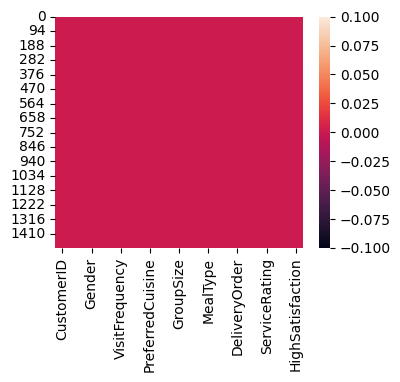

In [78]:
plt.figure(figsize=(4,3))
sns.heatmap(dataset.isnull())
plt.show()

In [79]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [80]:
dataset.duplicated().sum()

0

#detecting outliers


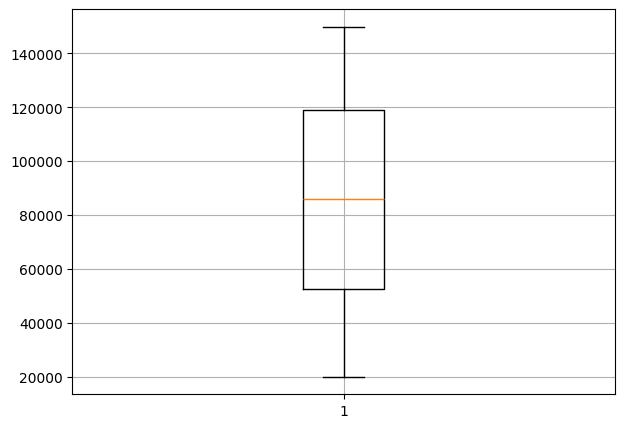

In [81]:
plt.figure(figsize=(7,5))
plt.boxplot(dataset["Income"])
plt.grid()
plt.show()

C:\Users\Manasa\AppData\Local\Temp\ipykernel_17340\3025429508.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Income"])


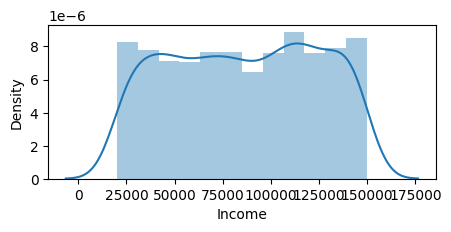

In [ ]:

plt.figure(figsize=(5,2))
sns.distplot(dataset["Income"])
plt.show()

feature scaling the  column 'Income' 

In [83]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
dataset["Income_scl"]=st.fit_transform(dataset[["Income"]])

visualizing the 'income' column before and after featuring scaling

C:\Users\Manasa\AppData\Local\Temp\ipykernel_17340\2070678951.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Income"])
C:\Users\Manasa\AppData\Local\Temp\ipykernel_17340\2070678951.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Income_scl"])


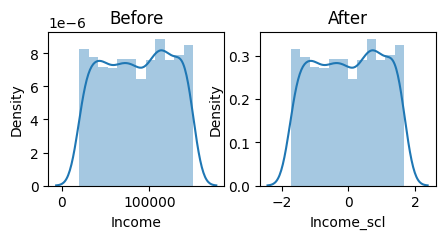

In [84]:
plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
sns.distplot(dataset["Income"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(dataset["Income_scl"])
plt.title("After")
plt.show()
          

In [85]:
dataset.select_dtypes(include="object").columns

Index(['Gender', 'VisitFrequency', 'PreferredCuisine', 'TimeOfVisit',
       'DiningOccasion', 'MealType'],
      dtype='object')

Labeling the gender column

In [86]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
lab.fit(dataset["Gender"])

LabelEncoder()

male 1 and female 0

In [87]:

dataset["Gender"]=lab.transform(dataset["Gender"])

labeling the column VisitFrequency

In [88]:
dataset["VisitFrequency"].unique()

array(['Weekly', 'Rarely', 'Monthly', 'Daily'], dtype=object)

In [89]:
data={"Daily":0,"Weekly":1,"Monthly":2,"Rarely":3}

In [90]:
dataset["VisitFrequency"]=dataset["VisitFrequency"].map(data)

In [91]:
dataset["DiningOccasion"]=lab.fit_transform(dataset["DiningOccasion"])
dataset["MealType"]=lab.fit_transform(dataset["MealType"])
dataset["PreferredCuisine"]=lab.fit_transform(dataset["PreferredCuisine"])


# 

In [92]:
dataset["TimeOfVisit"].unique()

array(['Breakfast', 'Dinner', 'Lunch'], dtype=object)

In [93]:
a=[["Breakfast","Lunch","Dinner"]]

In [94]:
from sklearn.preprocessing import OrdinalEncoder
ode=OrdinalEncoder(categories=a)
ode.fit(dataset[["TimeOfVisit"]])

OrdinalEncoder(categories=[['Breakfast', 'Lunch', 'Dinner']])

In [95]:
dataset["TimeOfVisit"]=ode.transform(dataset[["TimeOfVisit"]])

In [96]:
dataset.head(7)

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,WaitTime,ServiceRating,FoodRating,HighSatisfaction,Income_scl
0,654,35,1,83380,1,27.829142,1,0.0,3.000000,0,1,0,1,43.523929,2,5,0,-0.066593
1,655,19,1,43623,3,105.528404,0,2.0,1.000000,1,0,0,0,57.524294,5,5,0,-1.108162
2,656,41,0,83737,1,106.693771,0,2.0,6.000000,2,0,0,1,48.682623,3,4,0,-0.057241
3,657,43,1,96768,3,43.508508,2,1.0,1.000000,2,0,0,0,7.552993,4,5,0,0.284150
4,658,55,0,67937,2,148.084627,1,0.0,1.000000,0,1,0,0,37.789041,2,3,0,-0.471175
5,659,42,0,28860,2,111.064696,1,2.0,8.000000,2,1,0,1,26.853298,4,5,0,-1.494928
6,660,20,0,131104,1,120.236707,2,1.0,5.030956,0,0,0,0,7.927917,5,4,0,1.183697


In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1500 non-null   int64  
 1   Age                1500 non-null   int64  
 2   Gender             1500 non-null   int32  
 3   Income             1500 non-null   int64  
 4   VisitFrequency     1500 non-null   int64  
 5   AverageSpend       1500 non-null   float64
 6   PreferredCuisine   1500 non-null   int32  
 7   TimeOfVisit        1500 non-null   float64
 8   GroupSize          1500 non-null   float64
 9   DiningOccasion     1500 non-null   int32  
 10  MealType           1500 non-null   int32  
 11  OnlineReservation  1500 non-null   int64  
 12  DeliveryOrder      1500 non-null   int64  
 13  WaitTime           1500 non-null   float64
 14  ServiceRating      1500 non-null   int64  
 15  FoodRating         1500 non-null   int64  
 16  HighSatisfaction   1500 

converting GroupSize into int form

In [98]:
dataset["GroupSize"].astype("int32")

0       3
1       1
2       6
3       1
4       1
       ..
1495    2
1496    4
1497    4
1498    6
1499    4
Name: GroupSize, Length: 1500, dtype: int32

correlation between variables

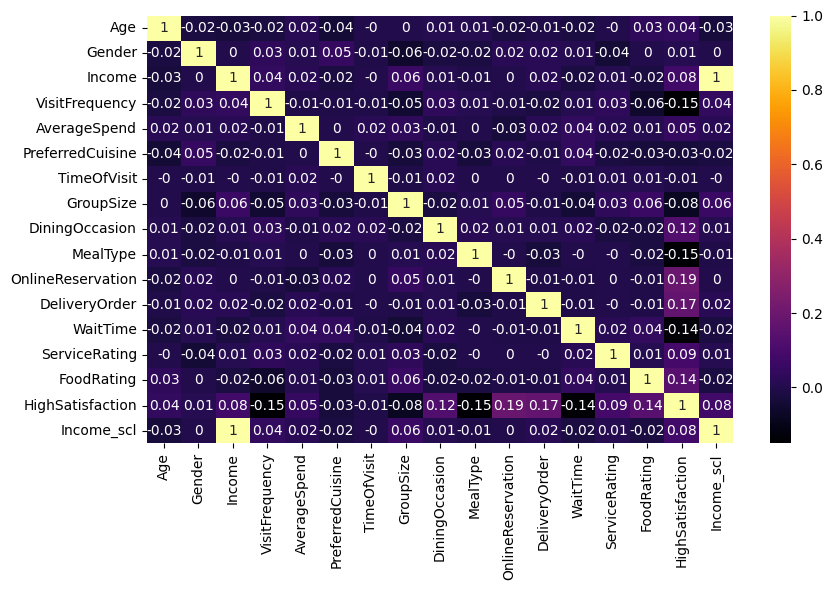

In [99]:

fig, ax =plt.subplots(figsize=(9,6))
sns.heatmap(round(dataset.drop('CustomerID',axis=1).corr(),2), cmap='inferno',annot=True,ax=ax)
plt.tight_layout()
plt.show()

Age" has stong postive correlation with "Income"   as age increases income might also tend to increase.

"Wait Time" shows stong negative correlation "Service Rating" as "wait time" decreases "service Rating might tend to decrease.

"High Satisfaction" has  positive correlations with "Service Rating," "Food Rating," and "OnlineReservation." this shows customers with higher satisfaction tend to have better experiences with service, food, and online reservations.

create a composite sentiment score by combining the ServiceRating, FoodRating columns. This sentiment 

The relation between the income and gender  male 1 and female 0

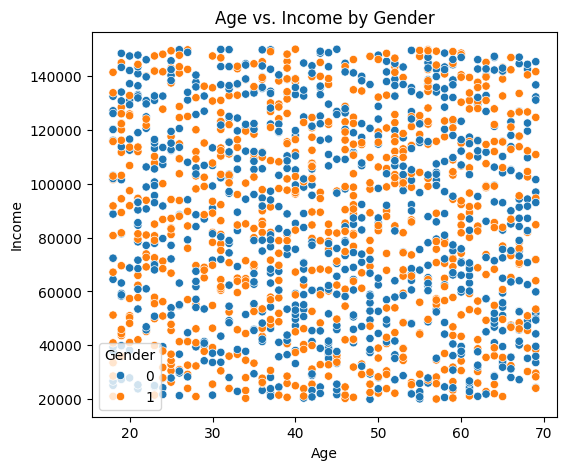

In [119]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Age', y='Income',hue='Gender',  data=dataset)
plt.title('Age vs. Income by Gender')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [101]:
dataset["VisitFrequency"].unique()

array([1, 3, 2, 0], dtype=int64)

Daily:0,Weekly:1,Monthly:2,Rarely:3
 
x-axis shows the different categories of visit frequency, labeled numerically  0, 1, 2, 3. These represent categorical values like "Daily",Rarely," "Monthly," "Weekly,"

The y-axis represents the wait time 

C:\Users\Manasa\AppData\Local\Temp\ipykernel_17340\2071192733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='VisitFrequency', y='WaitTime', data=dataset, palette='Blues')


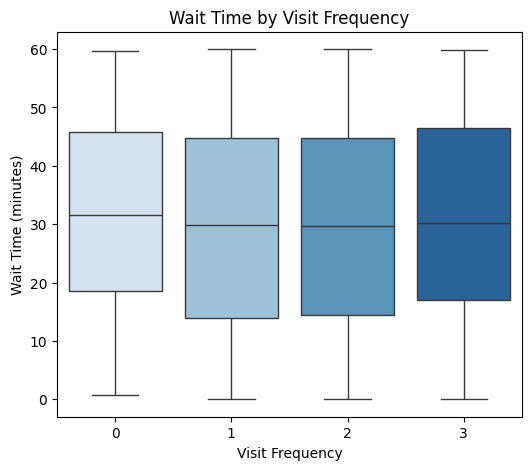

In [121]:
plt.figure(figsize=(6,5))
sns.boxplot(x='VisitFrequency', y='WaitTime', data=dataset, palette='Blues')
plt.title('Wait Time by Visit Frequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Wait Time (minutes)')
plt.show()

In [109]:
dataset[['ServiceRating', 'FoodRating']].mean(axis=1)

0       3.5
1       5.0
2       3.5
3       4.5
4       2.5
       ... 
1495    1.5
1496    3.5
1497    3.0
1498    2.0
1499    4.5
Length: 1500, dtype: float64

 Define sentiment categories based on the SentimentScore:

In [113]:
dataset['SentimentScore']=dataset[['ServiceRating', 'FoodRating']].mean(axis=1)
conditions = [
    (dataset['SentimentScore'] >= 4),
    (dataset['SentimentScore'] >= 2) & (dataset['SentimentScore'] < 4),
    (dataset['SentimentScore'] < 2)
]
sentiment_labels = ['Positive', 'Neutral', 'Negative']

In [114]:
dataset['SentimentCategory'] = pd.cut(dataset['SentimentScore'], bins=[0, 2, 4, 5], labels=['Negative', 'Neutral', 'Positive'])

# Check the distribution of sentiment categories
sentiment_counts = dataset['SentimentCategory'].value_counts()

dataset[['SentimentScore', 'SentimentCategory']].head()

,SentimentScore,SentimentCategory
0,3.5,Neutral
1,5.0,Positive
2,3.5,Neutral
3,4.5,Positive
4,2.5,Neutral


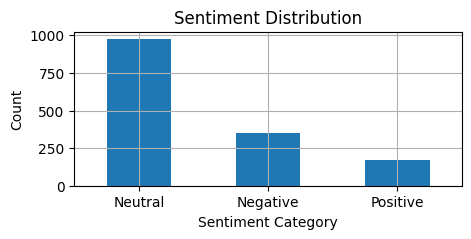

In [115]:
plt.figure(figsize=(5,2))
sentiment_counts.plot(kind='bar')
plt.grid()
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

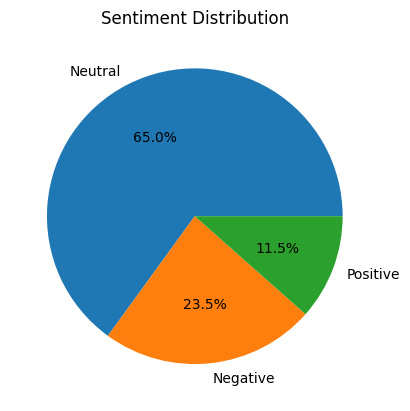

In [124]:


# Visualize the sentiment distribution using a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()